In [23]:

import cxgnncomp as cxgc
import torch
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt


def to_scipy(ptr, idx):
    ptr = ptr.cpu()
    idx = idx.cpu()
    deg = ptr[1:] - ptr[:-1]
    dst = torch.repeat_interleave(torch.arange(ptr.shape[0] - 1), deg)
    sci_mat = sp.coo_matrix((np.ones(dst.shape[0]), (dst.numpy(), idx.numpy(), )))
    return sci_mat


In [24]:
# dset = "products"
# x, ptr, idx, b = cxgc.prepare_data_full_graph(dset)
x, ptr, idx, b = cxgc.prepare_data_sampled_graph(dset="papers100M",
                                                 num_seeds=10000)
sci_mat = to_scipy(ptr, idx)

torch.Size([1457278]) torch.Size([14522499]) torch.Size([10257486, 128]) tensor([   10000,   122665,  1457277, 10257486])


tensor(10256665) tensor(0)
(1457277, 10256666)


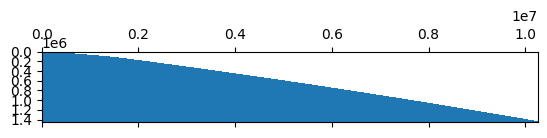

In [25]:
def start_from_zero(idx):
    idx = idx.cpu()
    mapping = {}
    cnt = 0
    unique_idx = []
    for i in range(len(idx)):
        item = idx[i].item()
        if not item in mapping:
            mapping[item] = cnt
            cnt += 1
            unique_idx.append(item)
    for i in range(len(idx)):
        idx[i] = mapping[idx[i].item()]
    return idx, unique_idx
idx, _ = start_from_zero(idx)
print(torch.max(idx), torch.min(idx))
sci_mat = to_scipy(ptr, idx)
print(sci_mat.shape)
plt.spy(sci_mat, markersize=0.002)

In [26]:
print(sci_mat.nnz)
print(sci_mat.shape)

14522499
(1457277, 10256666)
